In [1]:
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib as mpl 
mpl.rcParams["image.origin"] = 'lower'
# mpl.rcParams["image.dpi"] = '100'
from sklearn.metrics import auc

import numpy as np
import pandas as pd
from plotting import * 

import mplhep as hep
plt.style.use(hep.style.CMS)

In [17]:
df_ele = pd.read_csv("/eos/user/d/dvalsecc/www/ECAL/Clustering/DeepCluster/models_archive/gcn_models/gcn_models_SA_v11/run_01/en_regr/run_01/validation_data_thrs/validation_dataset_v10_ele.csv", sep=";")
df_gamma = pd.read_csv("/eos/user/d/dvalsecc/www/ECAL/Clustering/DeepCluster/models_archive/gcn_models/gcn_models_SA_v11/run_01/en_regr/run_01/validation_data_thrs/validation_dataset_v10_gamma.csv", sep=";")
# df_nomatch = pd.read_csv("/eos/user/d/dvalsecc/www/ECAL/Clustering/DeepCluster/models_archive/gcn_models/gcn_models_SA_v11/run_01/en_regr/run_01/validation_data/validation_dataset_v10_nomatch.csv", sep=";")

In [17]:
# df_tot = pd.concat([df_nomatch, df_ele, df_gamma], sort=False)
df_tot_match = pd.concat([df_ele, df_gamma], sort=False)

NameError: name 'df_gamma' is not defined

In [18]:
# Add variables
for df in [df_ele, df_gamma]:
    df['iz'] = df['seed_iz']
    df['ieta'] = df['seed_ieta']
    df['iphi'] = df['seed_iphi']
    df['eta'] = df['seed_eta']
    df['phi'] = df['seed_phi']
    df['en'] = df['en_seed']
    df['et'] = df['et_seed']

In [4]:
import mplhep as hep
plt.style.use(hep.style.CMS)

In [28]:
def bin_analysis(col):
    def f(df):
        m = df[col].mode().values[0]
        A = (df[col].quantile(0.84) - df[col].quantile(0.16))/2
        B = (df[col].quantile(0.025) - df[col].quantile(0.975))/2
        return pd.Series({
            "m": m,
            "w68": A,
            "w95": B,
            "N": df[col].count()
        })
    return f

# N clusters by threshold

In [5]:
df = df_ele
flavour = "Electron"

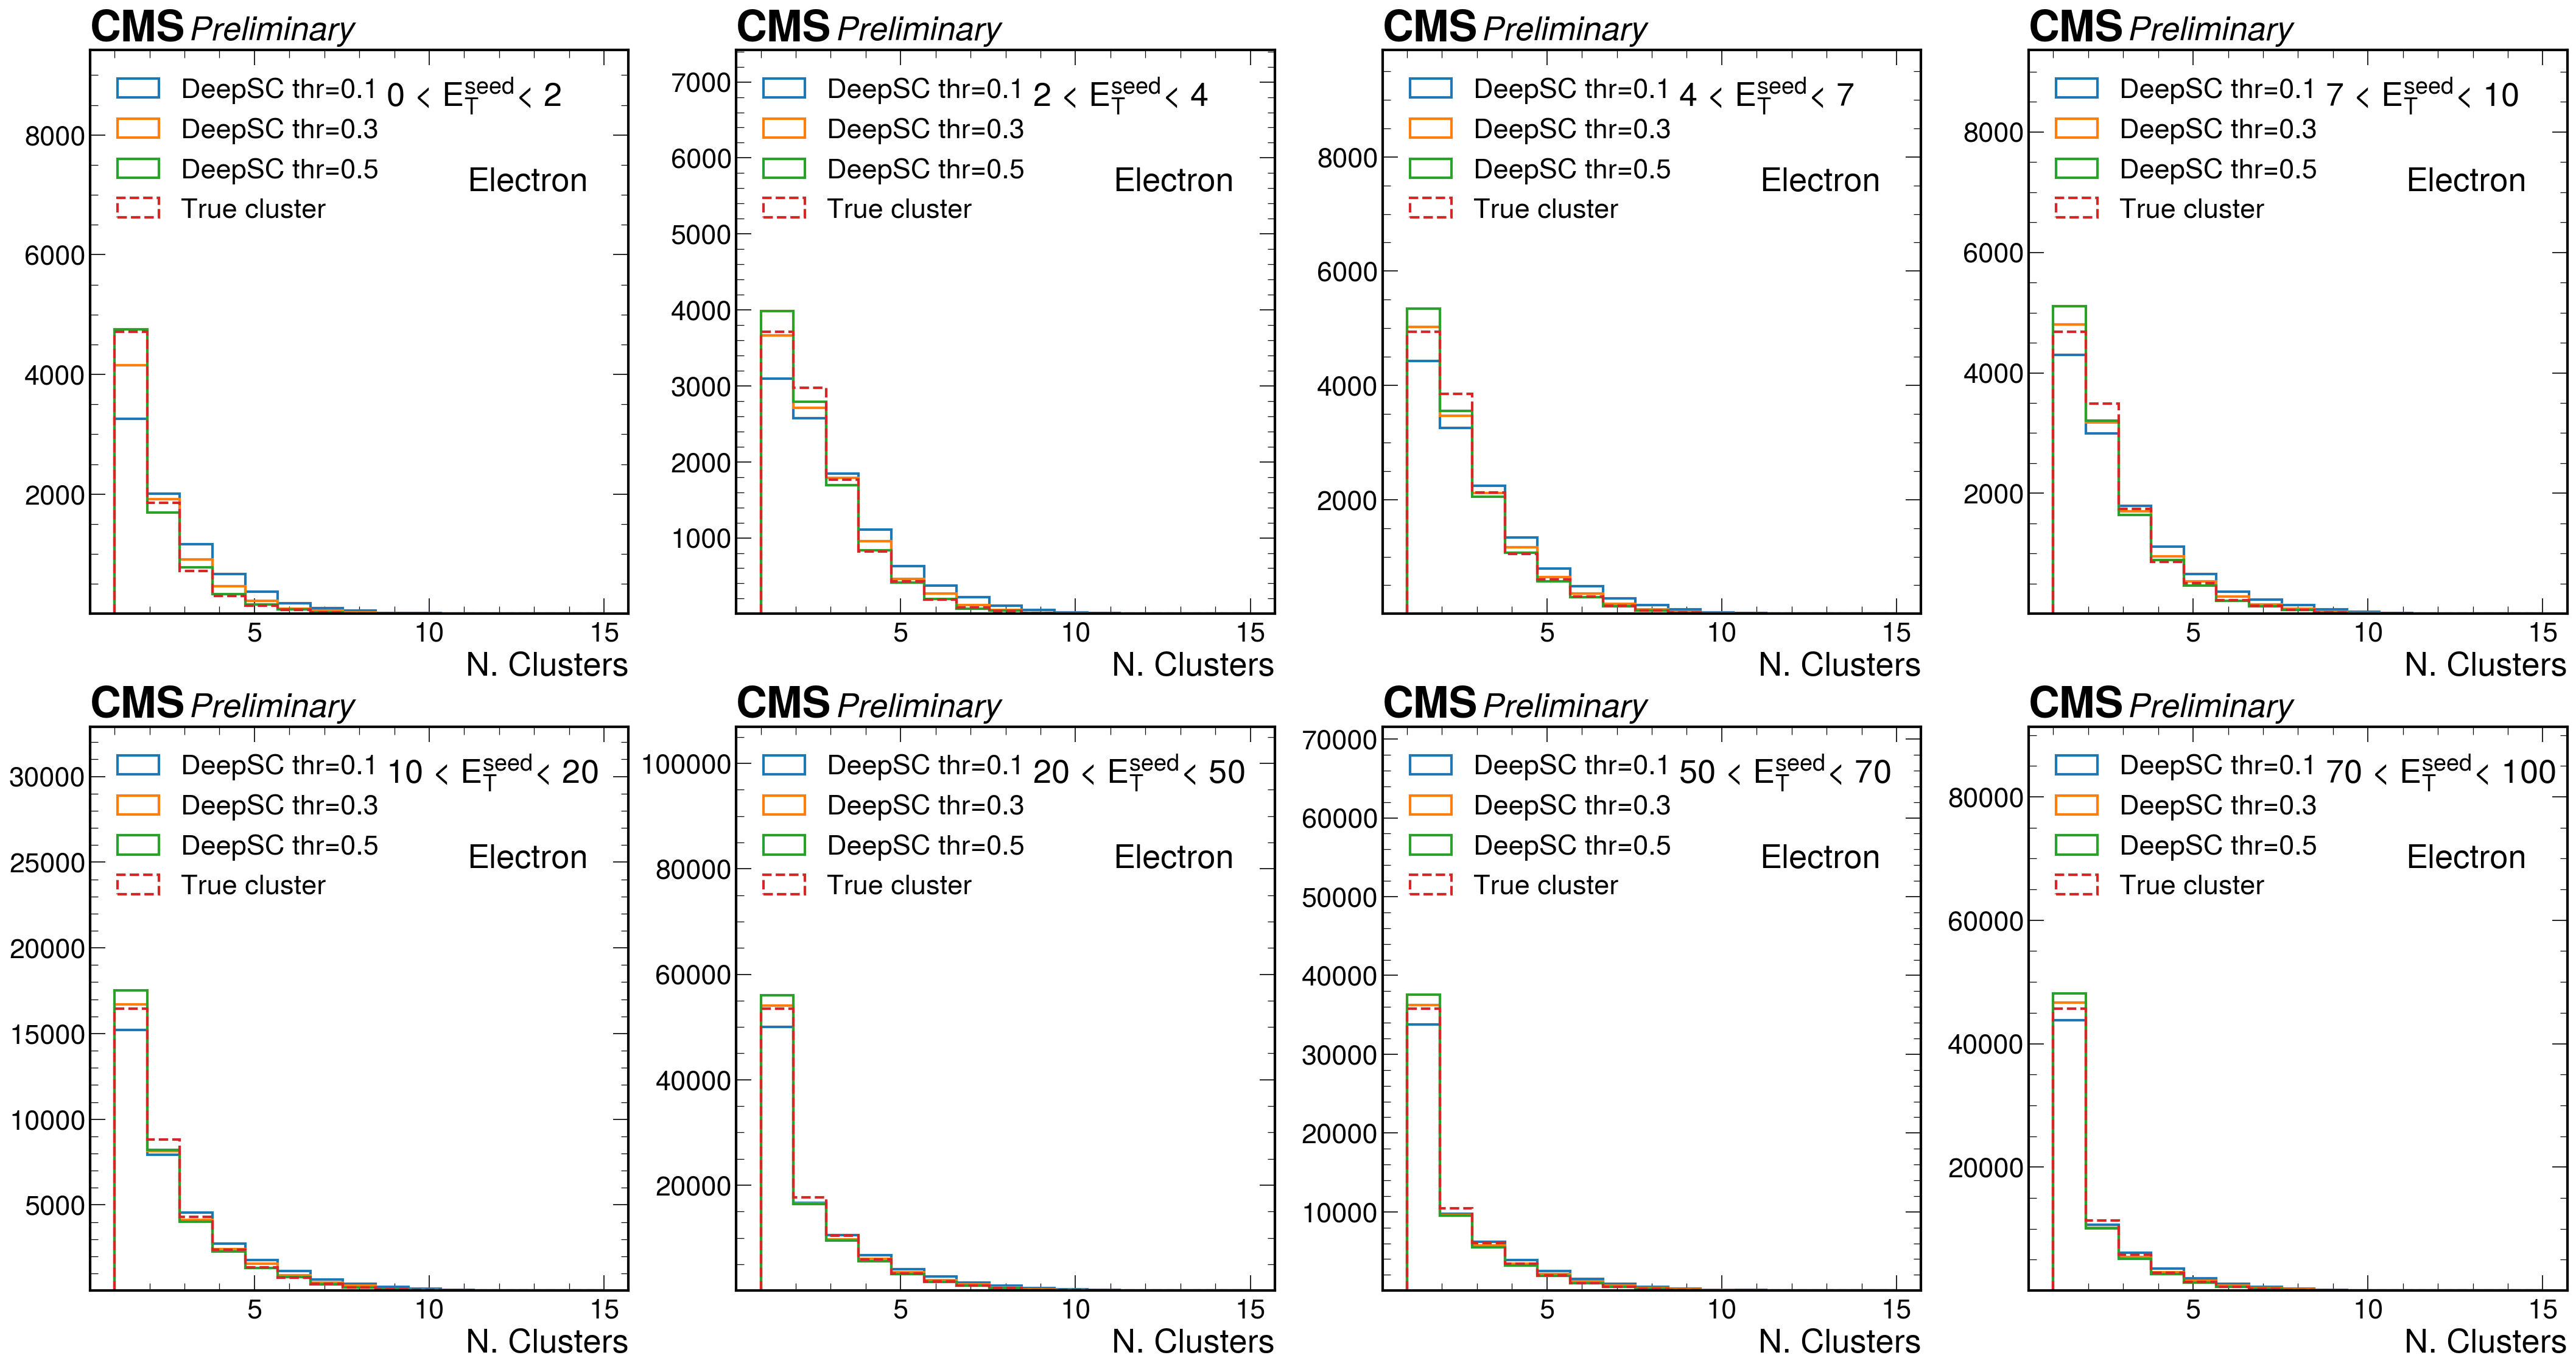

In [8]:
fig, ax = plt.subplots(2,4, figsize=(35,18),dpi=150)

xrange = (1,15)
bins= 15

ets = [ [(0,2),(2,4),(4,7),(7,10)],[(10,20),(20,50),(50,70),(70,100)]]

for j,etss in enumerate(ets): 
    for i, (e1,e2) in enumerate(etss): 
        for thr in [0.1,0.3,0.5]:
            ax[j,i].hist(df[(df.et>=e1) & (df.et<e2) & (df.thr==thr)].ncls_sel,bins=bins, range=xrange, histtype='step', linewidth=2, label='DeepSC thr={}'.format(thr))

#         A = ax[j,i].hist(df[(df.et>=e1) & (df.et<e2)& (df.thr==0.5)].ncls,bins=bins, range=xrange, histtype='step', linewidth=2, label='All clusters')
#         ax[j,i].hist(df[(df.et>=e1) & (df.et<e2)& (df.thr==0.5)].ncls_sel_must,bins=bins, range=xrange, histtype='step', linewidth=2, label='Mustache')
        A = ax[j,i].hist(df[(df.et>=e1) & (df.et<e2)& (df.thr==0.5)].ncls_true,bins=bins, range=xrange, histtype='step', linewidth=2, linestyle='dashed', label='True cluster')
        maxY = np.max(A[0])
        ax[j,i].legend(loc="upper left")
#         ax[j,i].set_yscale('log')
        ax[j,i].set_ylim(1, 2 * maxY)
        ax[j,i].set_xlabel("N. Clusters")
        ax[j,i].text(0.55,0.9,  str(e1) + ' < $E_T^{seed}$< ' + str(e2), transform = ax[j,i].transAxes)  
        ax[j,i].text(0.7, 0.75, flavour, transform=ax[j,i].transAxes)

        hep.cms.text("Preliminary ",loc=0, ax=ax[j,i])


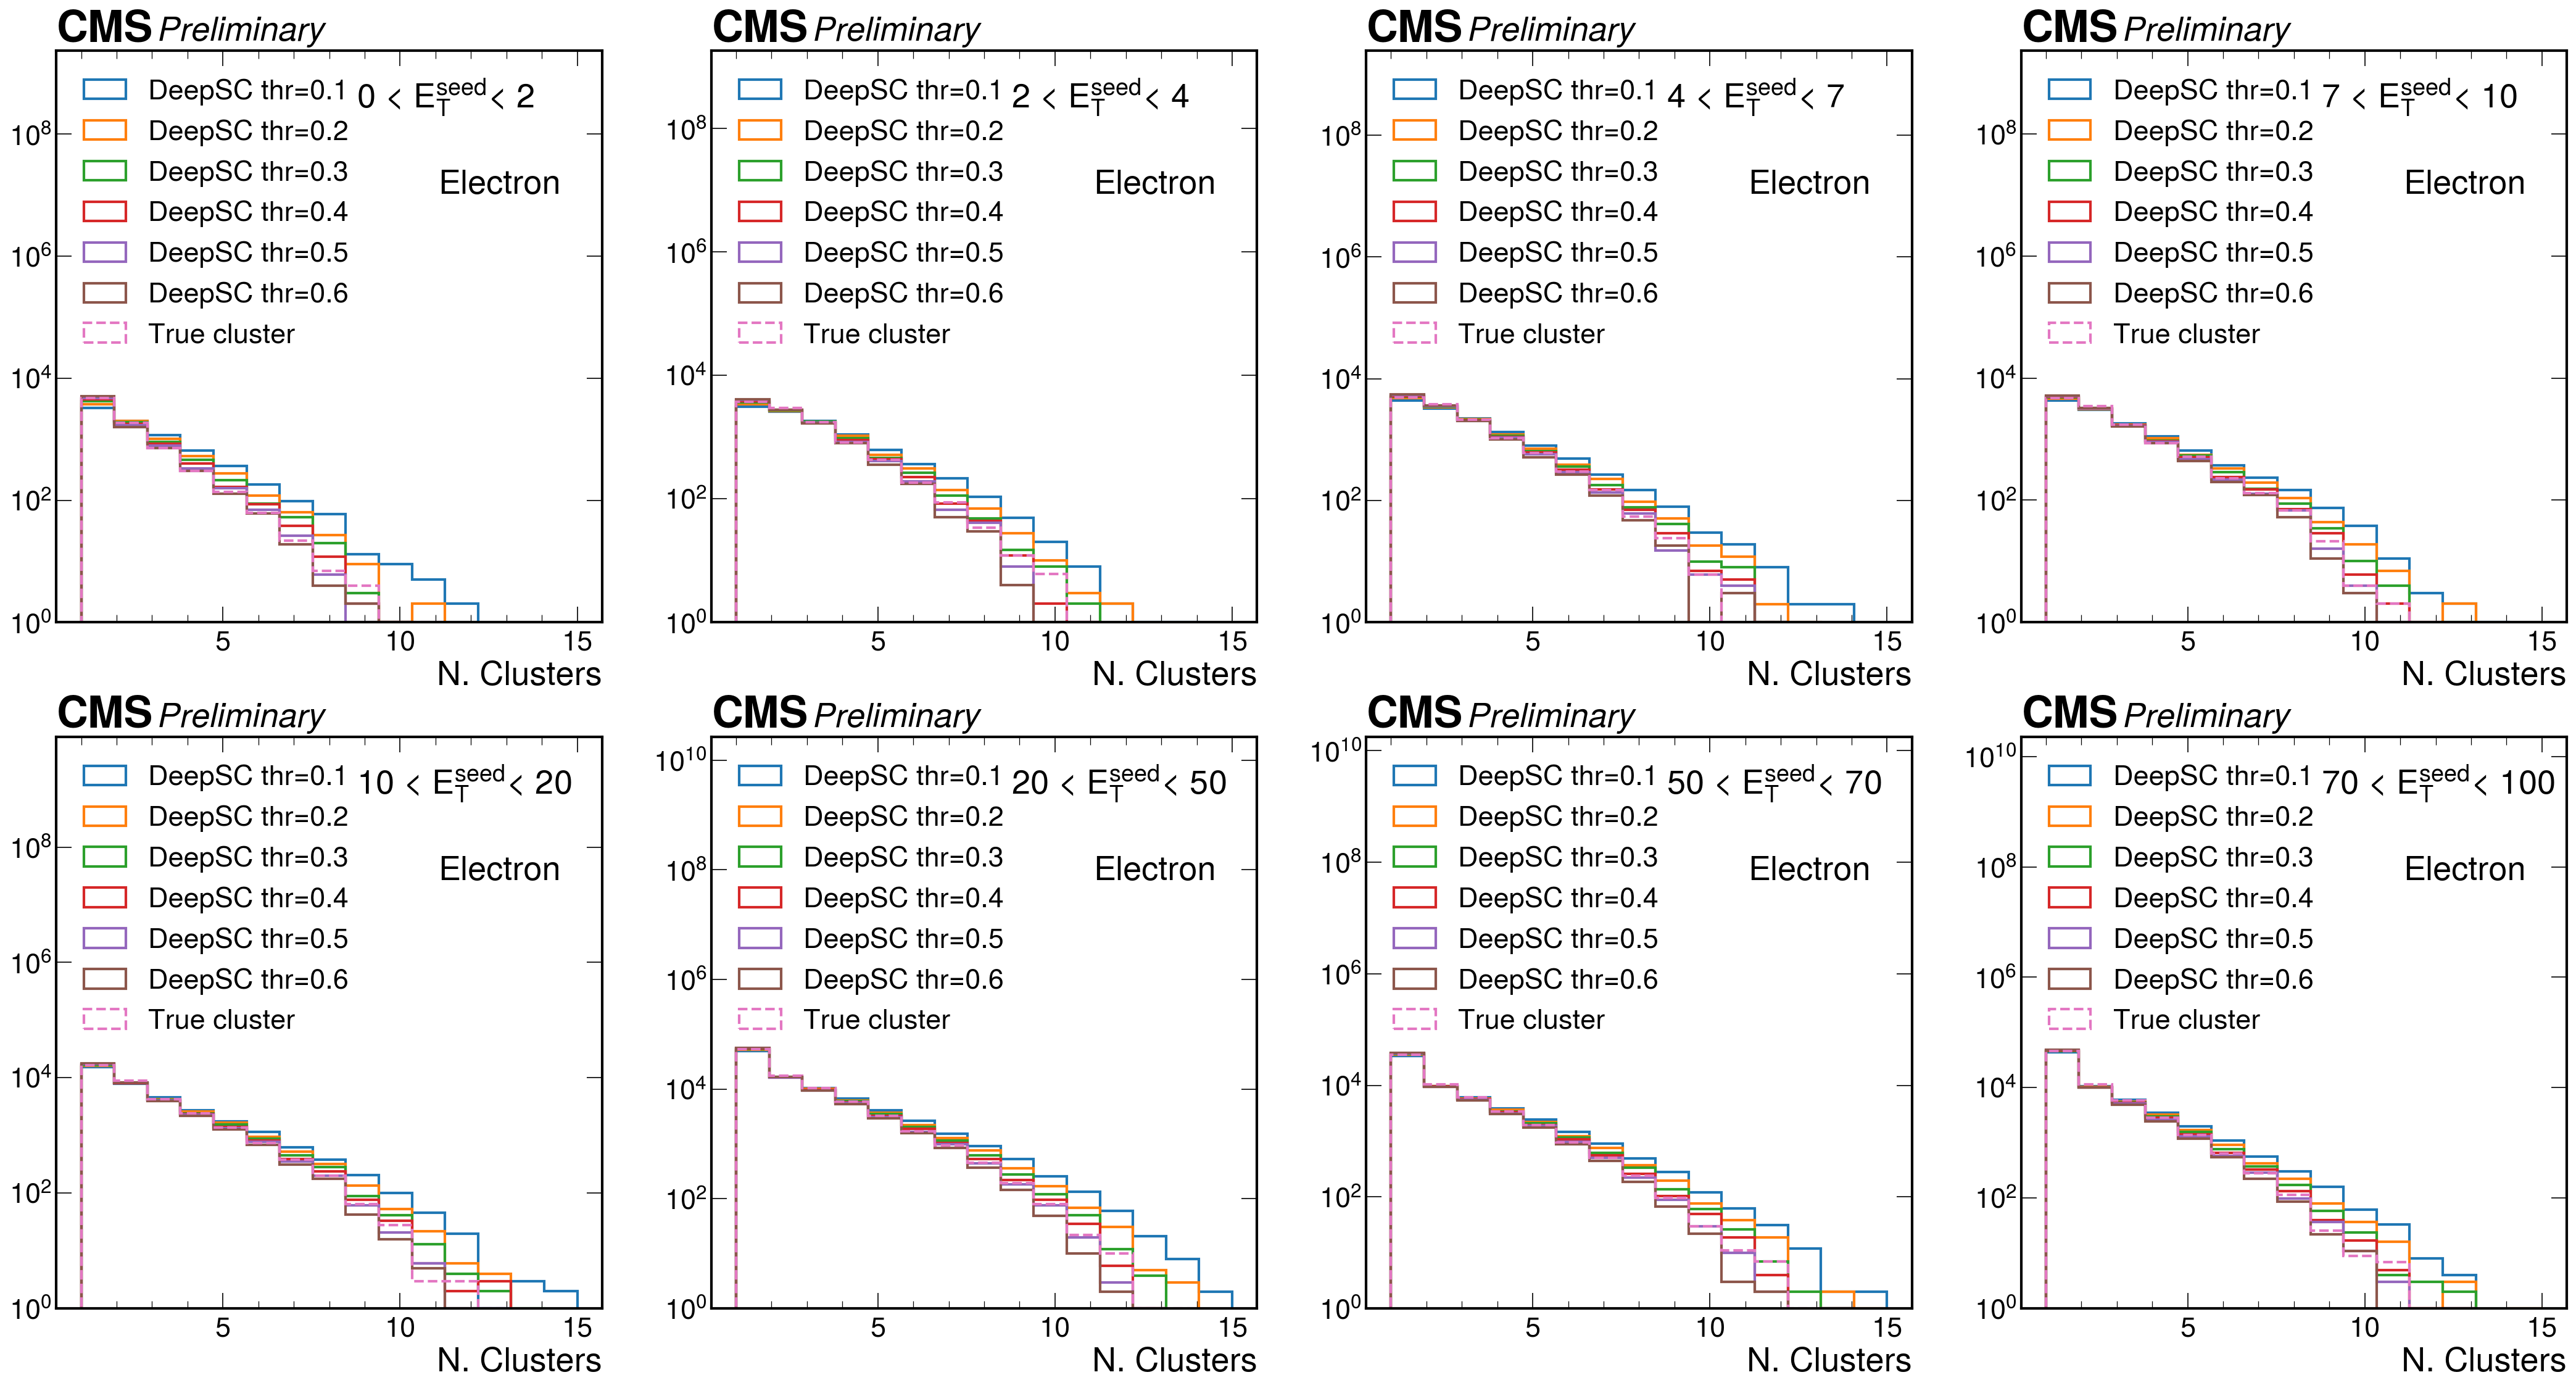

In [10]:
fig, ax = plt.subplots(2,4, figsize=(35,18),dpi=150)

xrange = (1,15)
bins= 15

ets = [ [(0,2),(2,4),(4,7),(7,10)],[(10,20),(20,50),(50,70),(70,100)]]

for j,etss in enumerate(ets): 
    for i, (e1,e2) in enumerate(etss): 
        for thr in [0.1,0.2,0.3,0.4,0.5,0.6]:
            ax[j,i].hist(df[(df.et>=e1) & (df.et<e2) & (df.thr==thr)].ncls_sel,bins=bins, range=xrange, histtype='step', linewidth=2, label='DeepSC thr={}'.format(thr))

#         A = ax[j,i].hist(df[(df.et>=e1) & (df.et<e2)& (df.thr==0.5)].ncls,bins=bins, range=xrange, histtype='step', linewidth=2, label='All clusters')
#         ax[j,i].hist(df[(df.et>=e1) & (df.et<e2)& (df.thr==0.5)].ncls_sel_must,bins=bins, range=xrange, histtype='step', linewidth=2, label='Mustache')
        A = ax[j,i].hist(df[(df.et>=e1) & (df.et<e2)& (df.thr==0.5)].ncls_true,bins=bins, range=xrange, histtype='step', linewidth=2, linestyle='dashed', label='True cluster')
        maxY = np.max(A[0])
        ax[j,i].legend(loc="upper left")
        ax[j,i].set_yscale('log')
        ax[j,i].set_ylim(1, 5e5 * maxY)
        ax[j,i].set_xlabel("N. Clusters")
        ax[j,i].text(0.55,0.9,  str(e1) + ' < $E_T^{seed}$< ' + str(e2), transform = ax[j,i].transAxes)  
        ax[j,i].text(0.7, 0.75, flavour, transform=ax[j,i].transAxes)

        hep.cms.text("Preliminary ",loc=0, ax=ax[j,i])
np.seterr(divide='ignore', invalid='ignore')

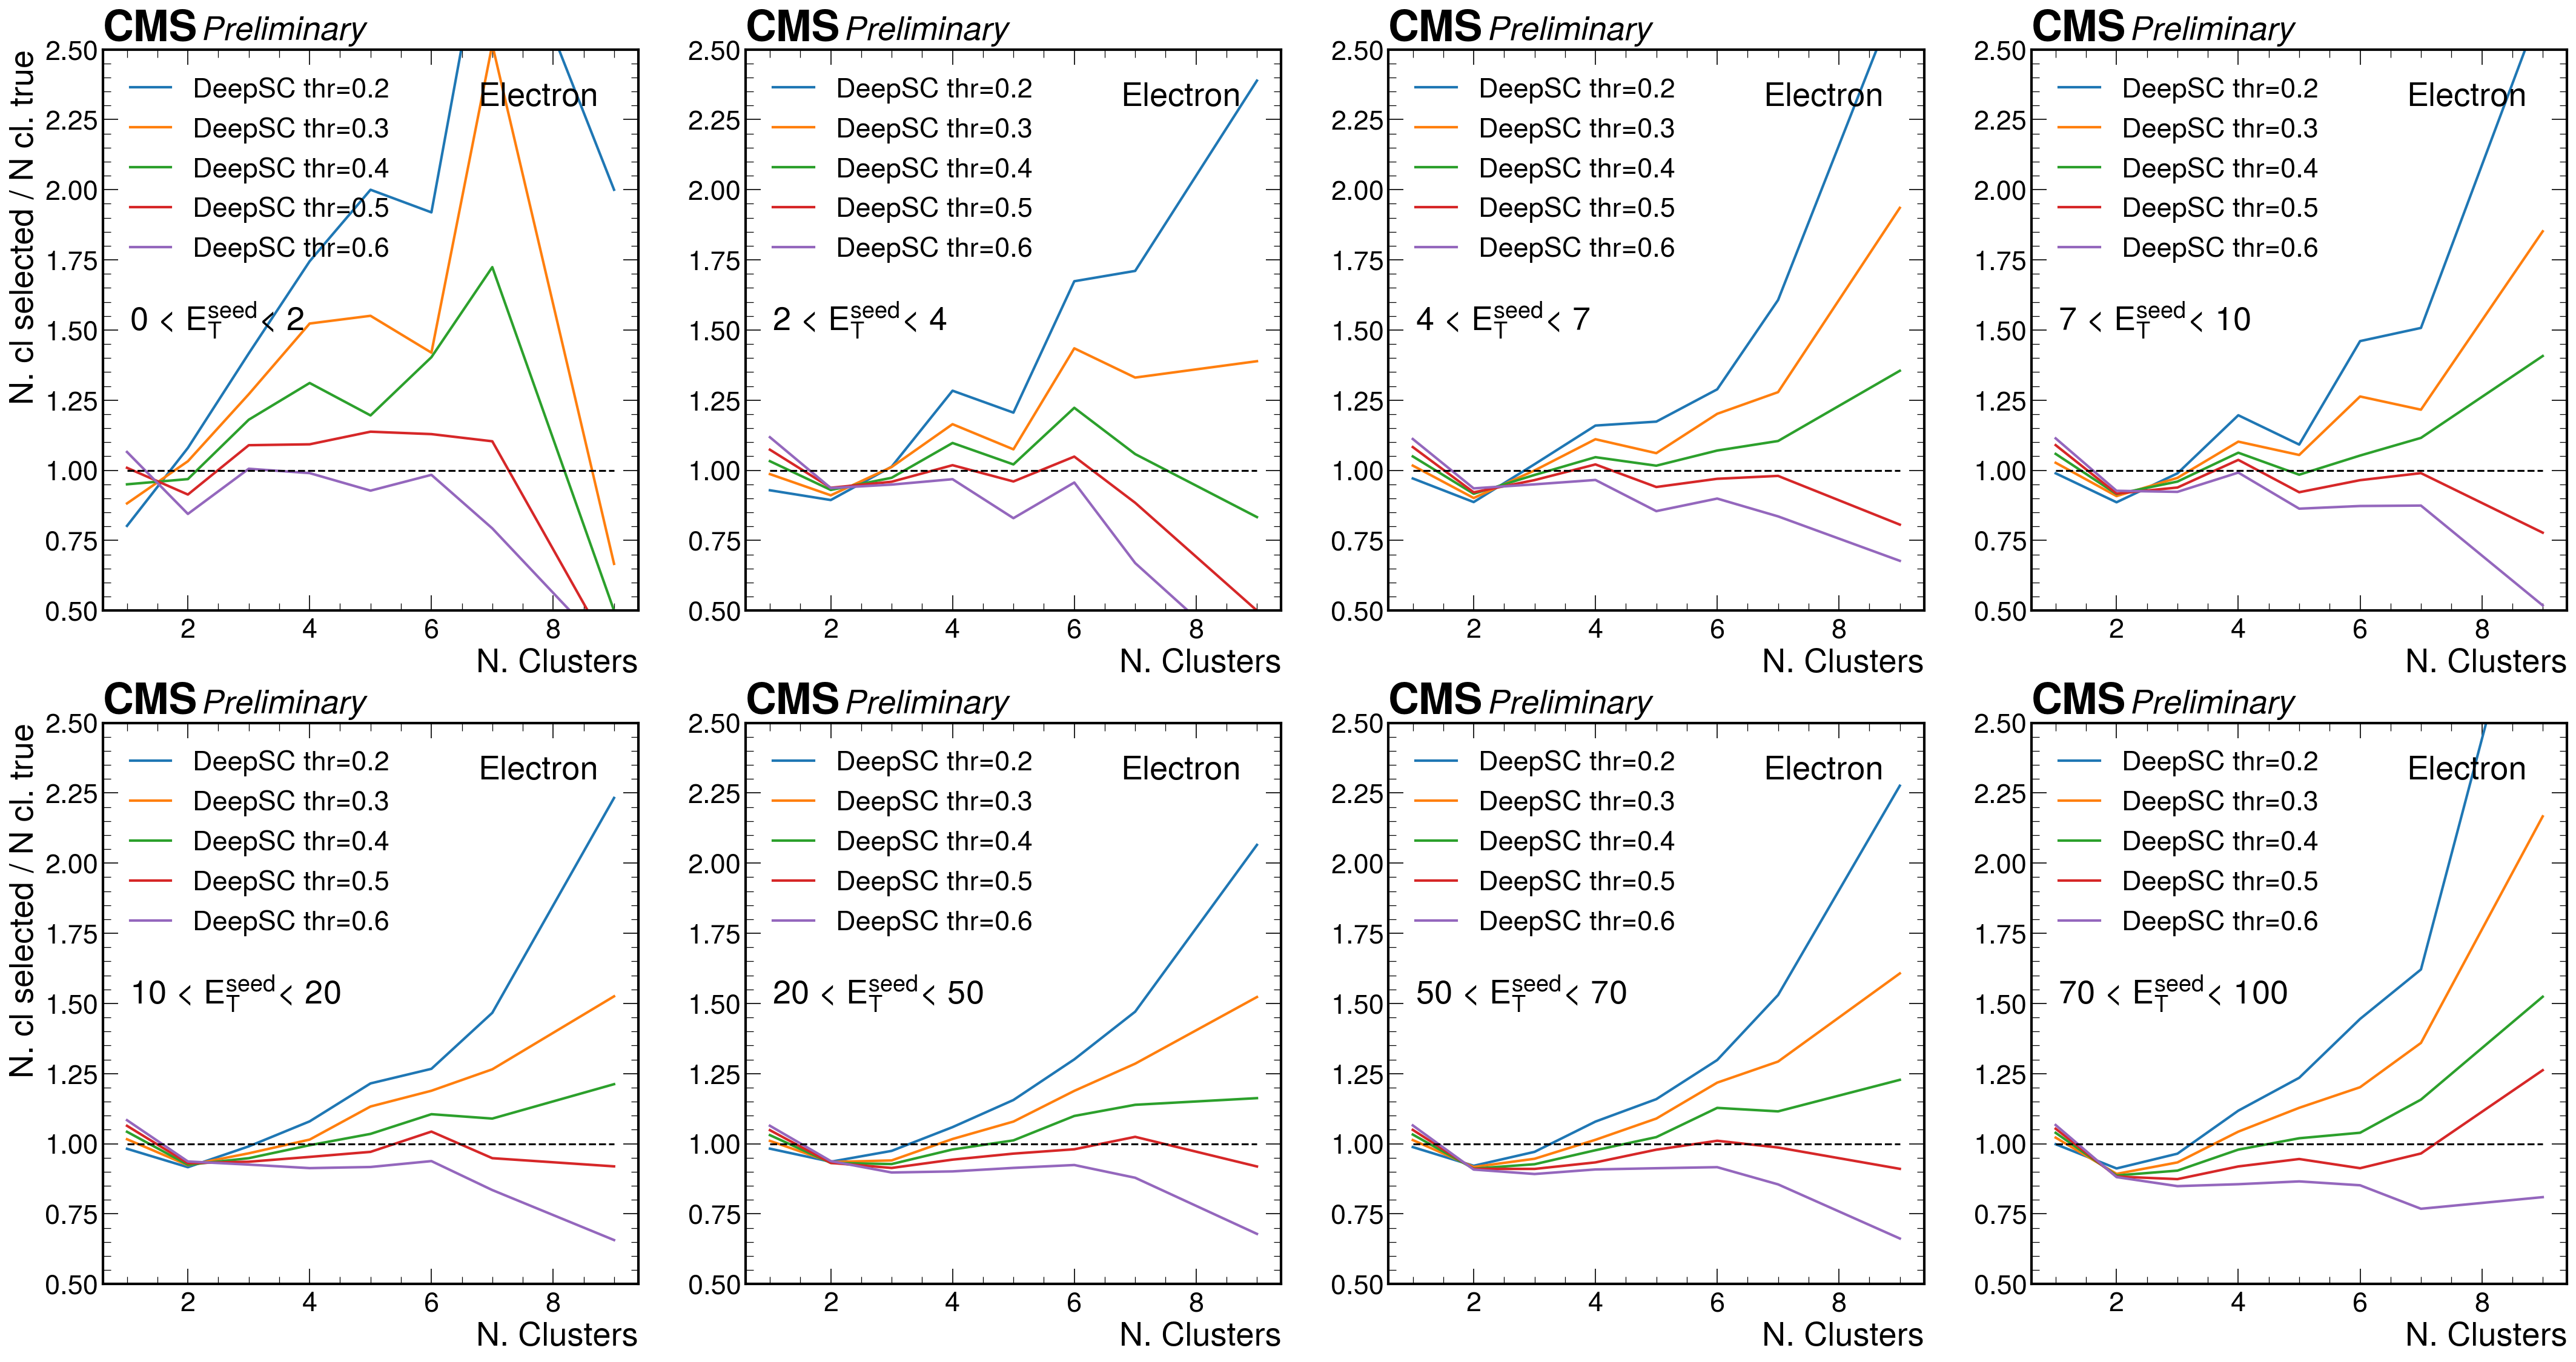

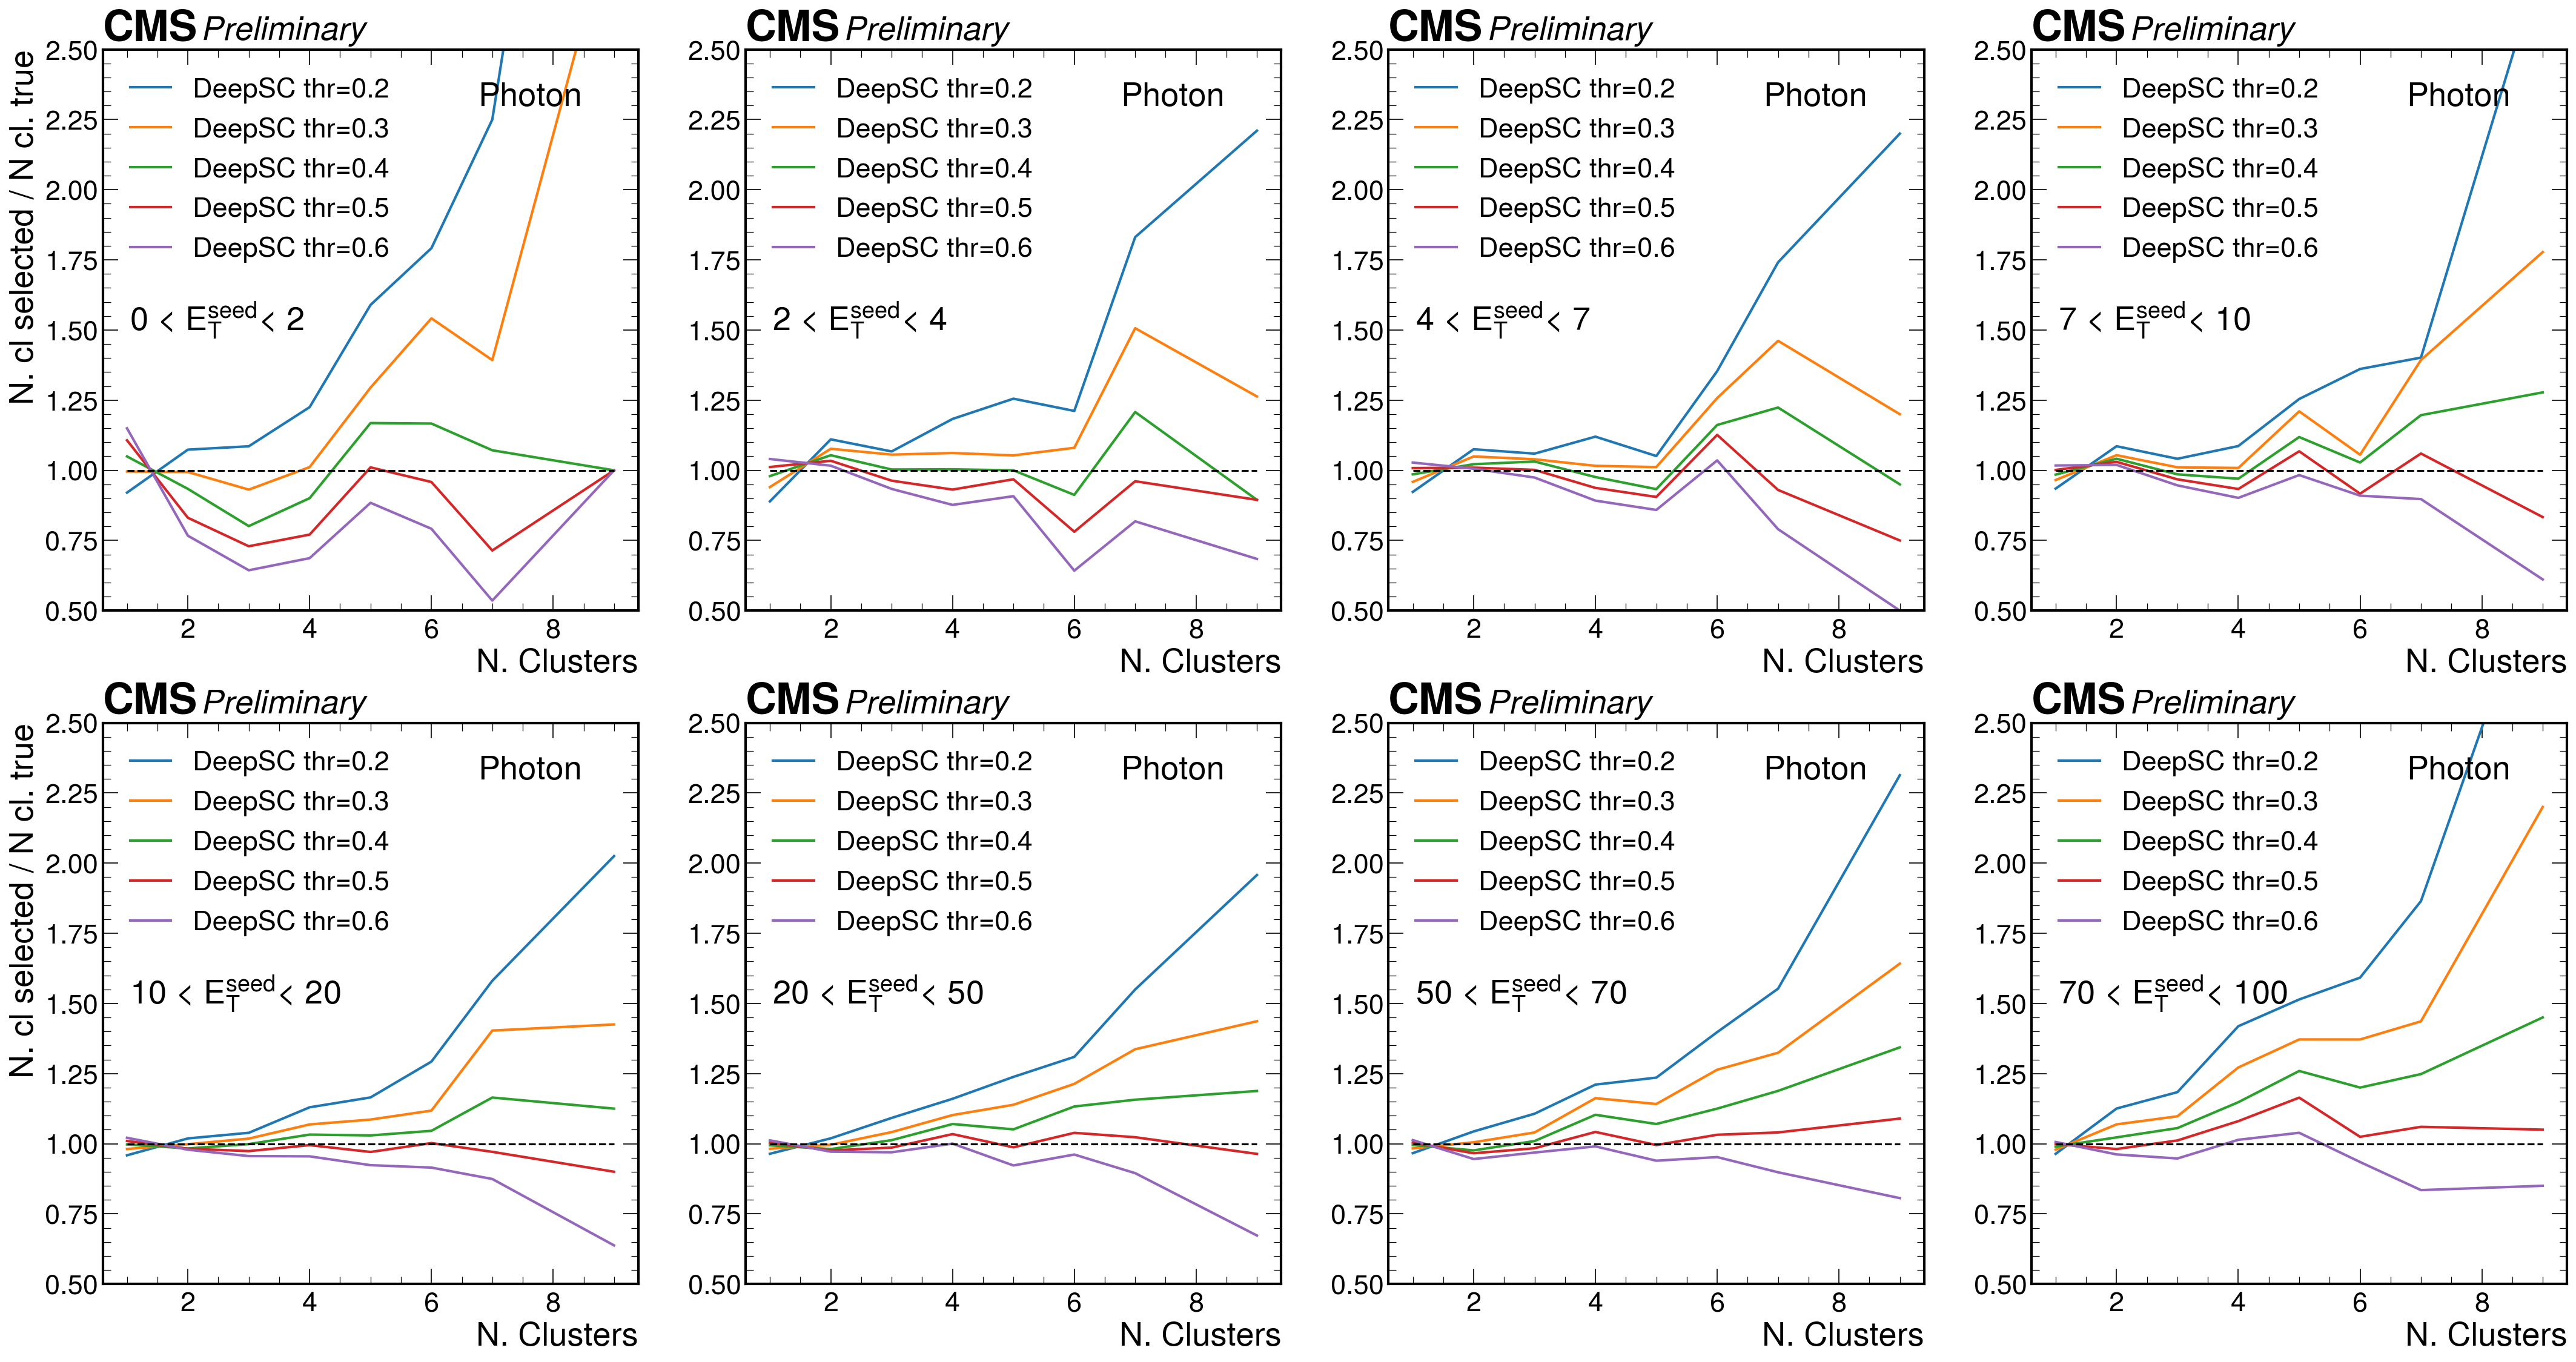

In [26]:
np.seterr(divide='ignore', invalid='ignore')

for df, flavour in zip([df_ele,df_gamma],["Electron","Photon"]):
    fig, ax = plt.subplots(2,4, figsize=(35,18),dpi=150)

    bins = [1,2,3,4,5,6,7,9,15]

    ets = [ [(0,2),(2,4),(4,7),(7,10)],[(10,20),(20,50),(50,70),(70,100)]]

    for j,etss in enumerate(ets): 
        for i, (e1,e2) in enumerate(etss): 
            A = np.histogram(df[(df.et>=e1) & (df.et<e2)& (df.thr==0.5)].ncls_true,bins=bins)


            for thr in [0.2,0.3,0.4,0.5,0.6]:
                B = np.histogram(df[(df.et>=e1) & (df.et<e2) & (df.thr==thr)].ncls_sel,bins=bins)
                ax[j,i].plot(A[1][:-1], B[0]/A[0], linewidth=2, label='DeepSC thr={}'.format(thr))

    #         A = ax[j,i].hist(df[(df.et>=e1) & (df.et<e2)& (df.thr==0.5)].ncls,bins=bins, range=xrange, histtype='step', linewidth=2, label='All clusters')
    #         ax[j,i].hist(df[(df.et>=e1) & (df.et<e2)& (df.thr==0.5)].ncls_sel_must,bins=bins, range=xrange, histtype='step', linewidth=2, label='Mustache')

            ax[j,i].plot([1,len(bins)],[1,1], linestyle="dashed", color="black")
            ax[j,i].legend(loc="upper left")
    #         ax[j,i].set_yscale('log')
            ax[j,i].set_ylim(0.5,2.5)
            if i==0:
                ax[j,i].set_ylabel("N. cl selected / N cl. true")
            ax[j,i].set_xlabel("N. Clusters")
            ax[j,i].text(0.05,0.5,  str(e1) + ' < $E_T^{seed}$< ' + str(e2), transform = ax[j,i].transAxes)  
            ax[j,i].text(0.7, 0.9, flavour, transform=ax[j,i].transAxes)

            hep.cms.text("Preliminary ",loc=0, ax=ax[j,i])


# Resolution plots - by threshold

<ipython-input-36-7569ad618ae4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["et_bin"] = pd.cut(df.et, ets, labels=list(range(len(ets)-1)))
<ipython-input-36-7569ad618ae4>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["eta_bin"] = pd.cut(df.eta, etas, labels=list(range(len(etas)-1)))
<ipython-input-36-7569ad618ae4>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Preliminary'))

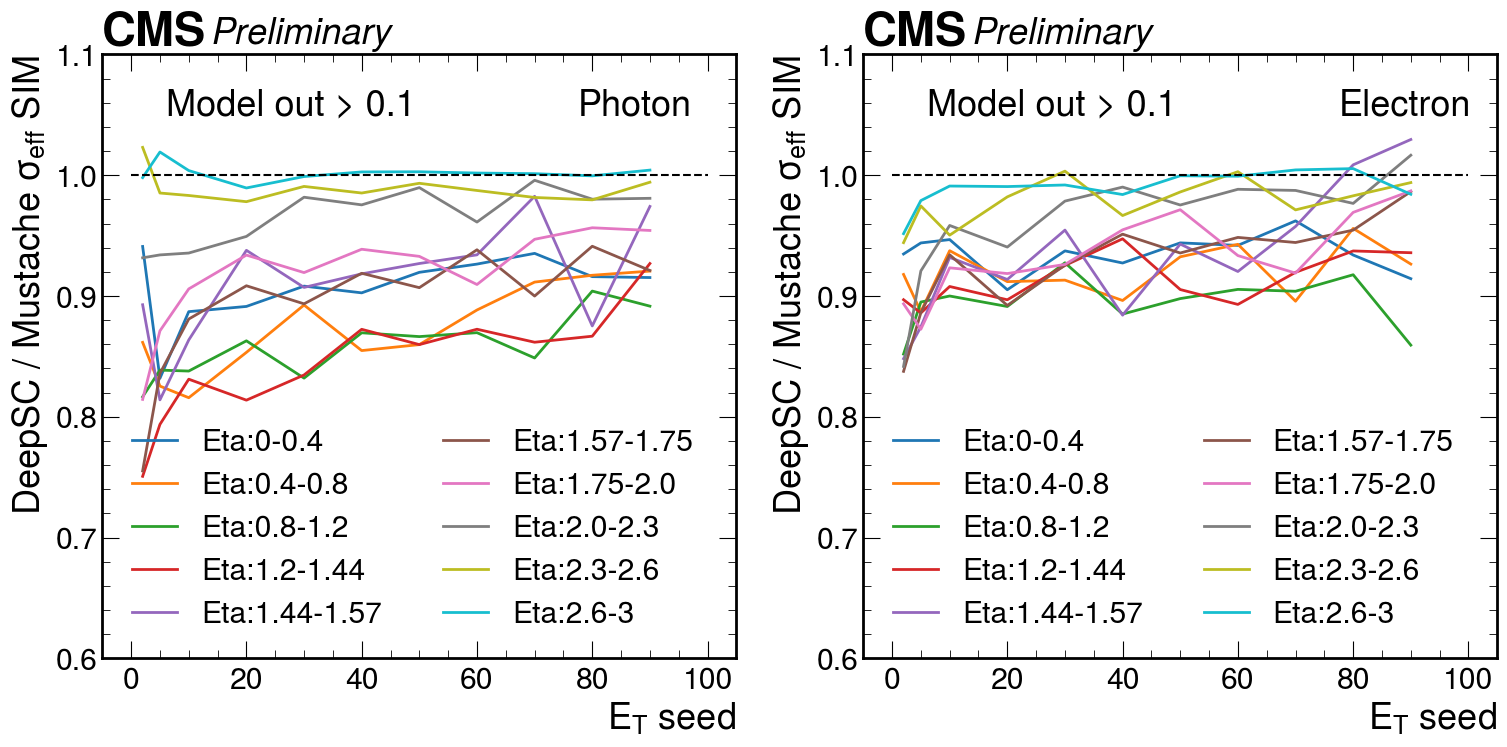

In [36]:
fig, (ax, ay) = plt.subplots(1,2, figsize=(18,8),dpi=100, )

thr = 0.1
df = df_gamma[df_gamma.thr==thr]
flavour = "Photon"
ets = [2, 5, 10, 20,30,40,50,60,70,80,90,100]
etas = [0, 0.4,0.8, 1.2,1.44, 1.57, 1.75,2.,2.3,2.6,3]
df["et_bin"] = pd.cut(df.et, ets, labels=list(range(len(ets)-1)))
df["eta_bin"] = pd.cut(df.eta, etas, labels=list(range(len(etas)-1)))


res = df.groupby(["et_bin","eta_bin"]).apply(bin_analysis("En_ovEtrue_sim_good"))
res_must = df.groupby(["et_bin","eta_bin"]).apply(bin_analysis("En_ovEtrue_sim_good_mustache"))
res.reset_index(level=0, inplace=True)
res.reset_index(level=0, inplace=True)
res_must.reset_index(level=0, inplace=True)
res_must.reset_index(level=0, inplace=True)


# gs = fig.add_gridspec(2, hspace=0.1, height_ratios=[0.8,0.2])
# axs = gs.subplots(sharex=True)

for ieta, eta in enumerate(etas[:-1]):
    ax.plot(ets[:-1], res[res.eta_bin == ieta].w68/res_must[res_must.eta_bin == ieta].w68, label="Eta:{}-{}".format(etas[ieta], etas[ieta+1]), linewidth=2)
ax.set_ylim(0.6, 1.1)
ax.set_ylabel("DeepSC / Mustache $\sigma_{eff}$ SIM")
ax.legend(ncol=2)
ax.set_xlabel("$E_T$ seed")
ax.plot([0,100],[1,1], linestyle="dashed", color="black")

ax.text(0.75, 0.9, flavour, transform=ax.transAxes)
ax.text(0.1, 0.9, "Model out > {}".format(thr), transform=ax.transAxes)
hep.cms.text("Preliminary", loc=0, ax=ax)



df = df_ele[df_ele.thr==thr]
flavour = "Electron"

ets = [2, 5,10,20,30,40,50,60,70,80,90,100]
etas =  [0, 0.4,0.8, 1.2,1.44, 1.57, 1.75,2.,2.3,2.6,3]
df["et_bin"] = pd.cut(df.et, ets, labels=list(range(len(ets)-1)))
df["eta_bin"] = pd.cut(df.eta, etas, labels=list(range(len(etas)-1)))


res = df.groupby(["et_bin","eta_bin"]).apply(bin_analysis("En_ovEtrue_sim_good"))
res_must = df.groupby(["et_bin","eta_bin"]).apply(bin_analysis("En_ovEtrue_sim_good_mustache"))
res.reset_index(level=0, inplace=True)
res.reset_index(level=0, inplace=True)
res_must.reset_index(level=0, inplace=True)
res_must.reset_index(level=0, inplace=True)

for ieta, eta in enumerate(etas[:-1]):
    ay.plot(ets[:-1], res[res.eta_bin == ieta].w68/res_must[res_must.eta_bin == ieta].w68, label="Eta:{}-{}".format(etas[ieta], etas[ieta+1]), linewidth=2)
ay.set_ylim(0.6, 1.1)
ay.set_ylabel("DeepSC / Mustache $\sigma_{eff}$ SIM")
ay.legend(ncol=2)
ay.set_xlabel("$E_T$ seed")
ay.plot([0,100],[1,1], linestyle="dashed", color="black")

ay.text(0.75, 0.9, flavour, transform=ay.transAxes)
ay.text(0.1, 0.9, "Model out > {}".format(thr), transform=ay.transAxes)

hep.cms.text("Preliminary", loc=0, ax=ay)

<ipython-input-31-07ec5795ba96>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["et_bin"] = pd.cut(df.et, ets, labels=list(range(len(ets)-1)))
<ipython-input-31-07ec5795ba96>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["eta_bin"] = pd.cut(df.eta, etas, labels=list(range(len(etas)-1)))
<ipython-input-31-07ec5795ba96>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

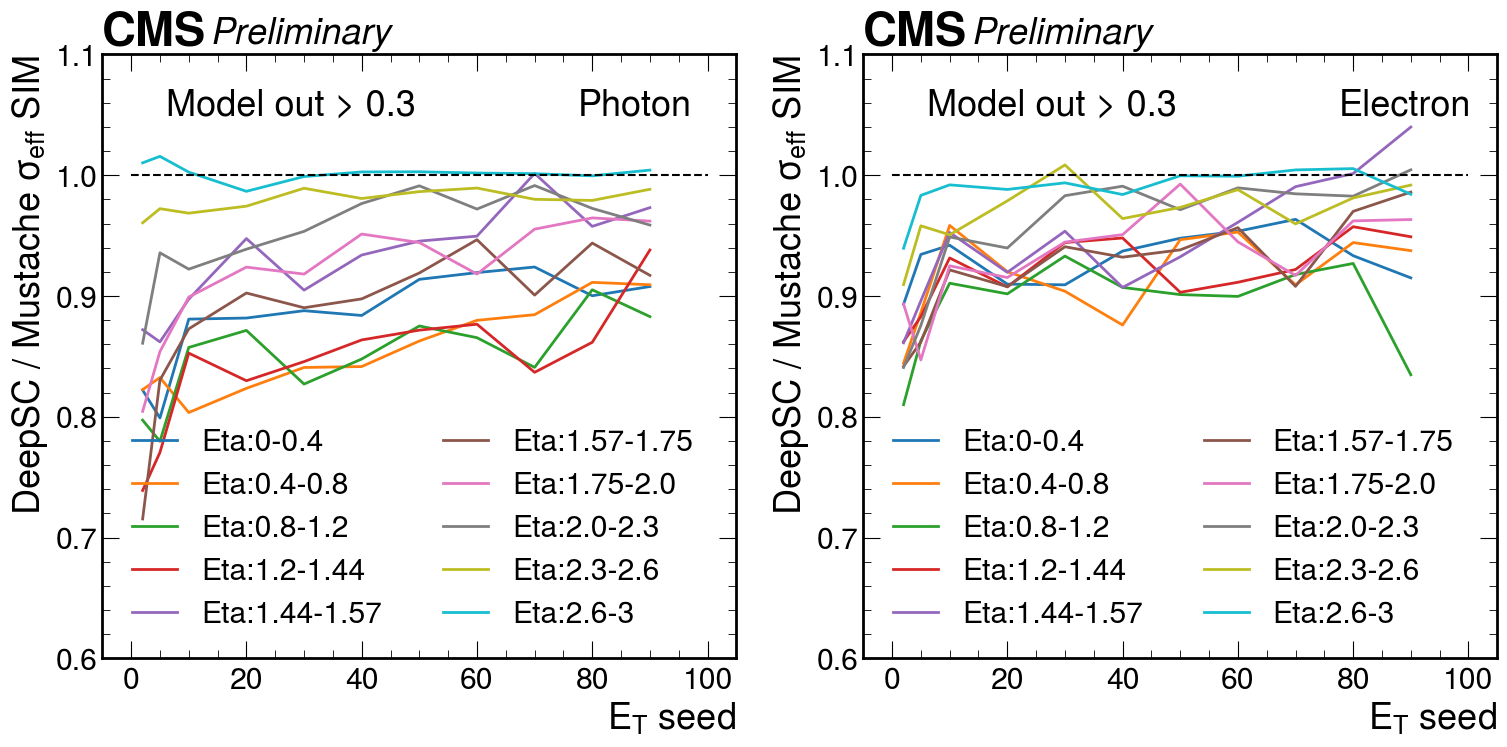

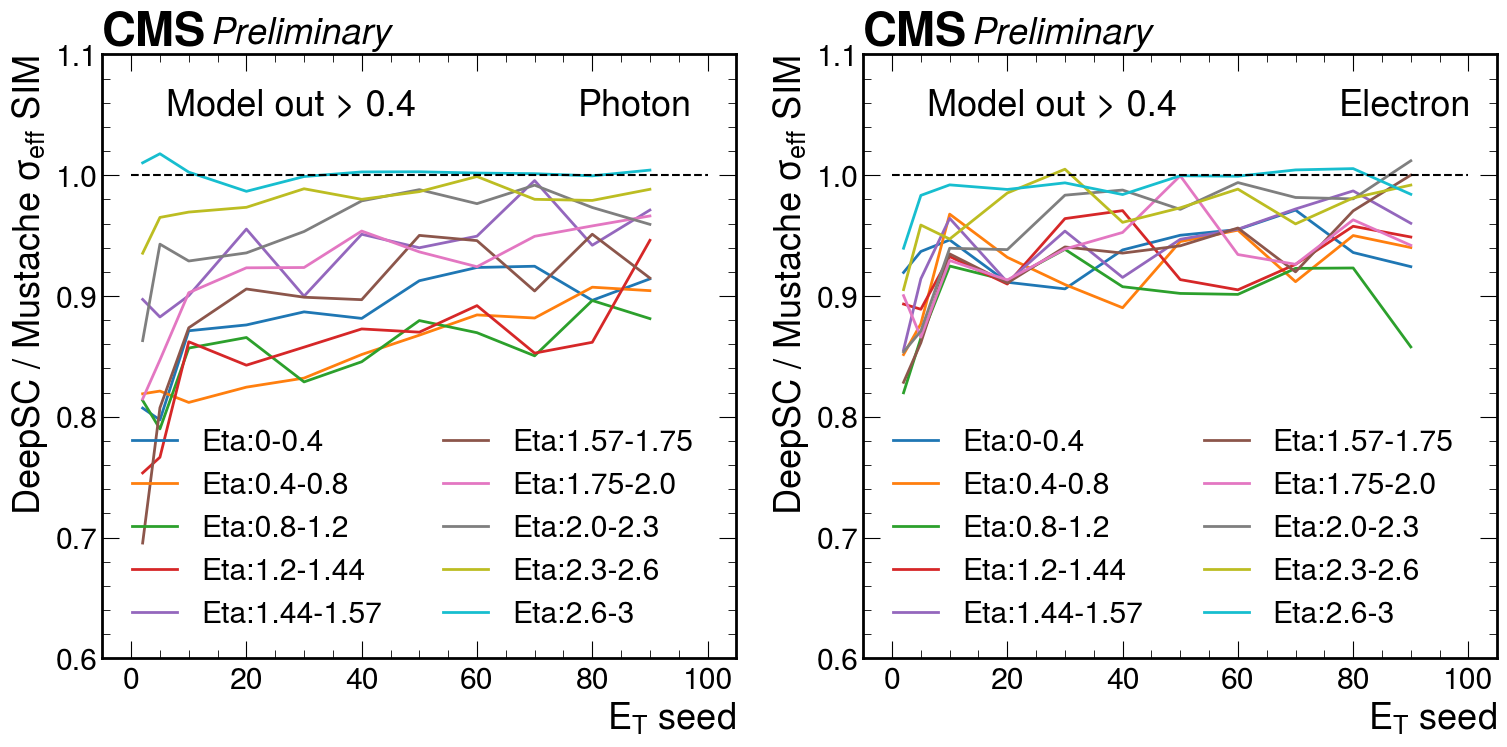

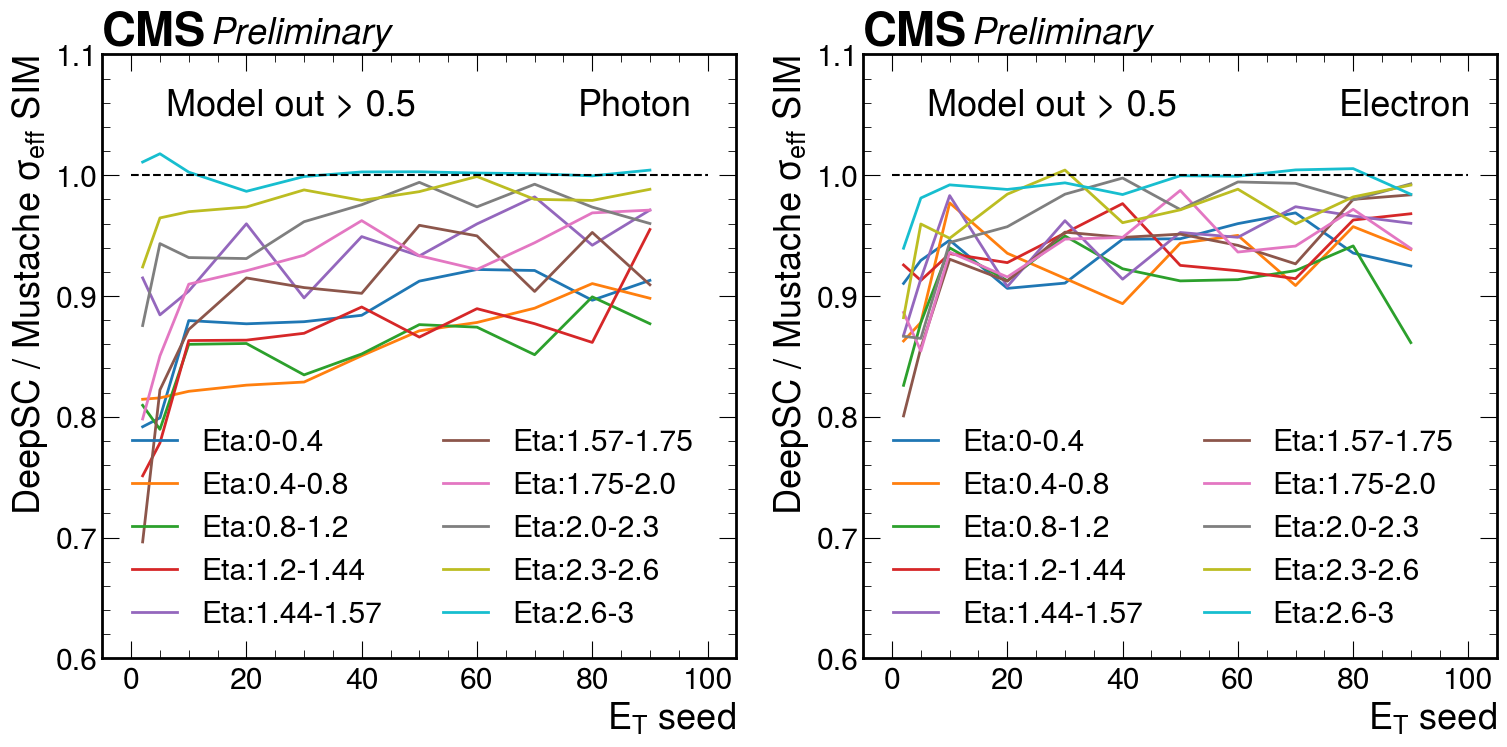

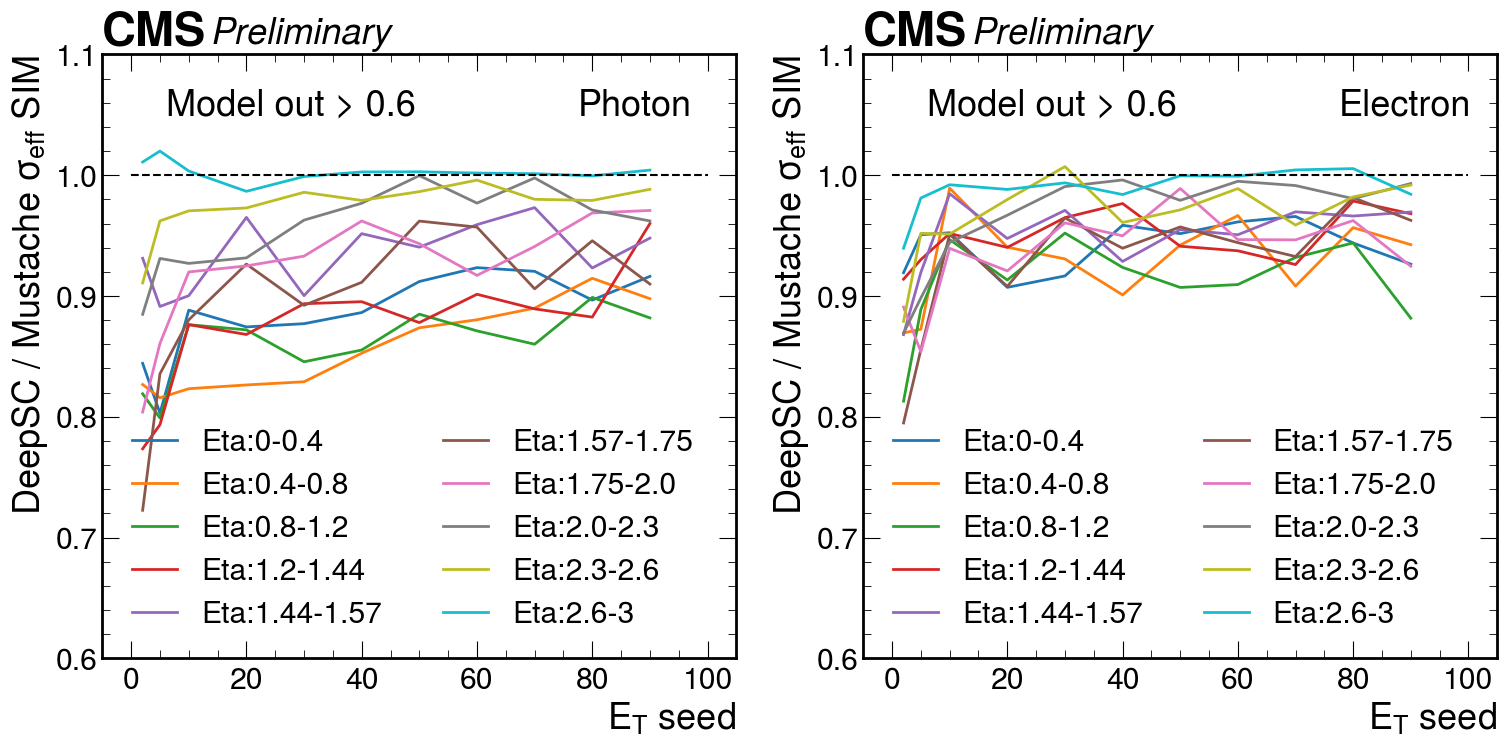

In [31]:
for thr in [0.3,0.4,0.5, 0.6]:
    fig, (ax, ay) = plt.subplots(1,2, figsize=(18,8),dpi=100, )

    df = df_gamma[df_gamma.thr==thr]
    flavour = "Photon"
    ets = [2, 5, 10, 20,30,40,50,60,70,80,90,100]
    etas = [0, 0.4,0.8, 1.2,1.44, 1.57, 1.75,2.,2.3,2.6,3]
    df["et_bin"] = pd.cut(df.et, ets, labels=list(range(len(ets)-1)))
    df["eta_bin"] = pd.cut(df.eta, etas, labels=list(range(len(etas)-1)))


    res = df.groupby(["et_bin","eta_bin"]).apply(bin_analysis("En_ovEtrue_sim_good"))
    res_must = df.groupby(["et_bin","eta_bin"]).apply(bin_analysis("En_ovEtrue_sim_good_mustache"))
    res.reset_index(level=0, inplace=True)
    res.reset_index(level=0, inplace=True)
    res_must.reset_index(level=0, inplace=True)
    res_must.reset_index(level=0, inplace=True)


    # gs = fig.add_gridspec(2, hspace=0.1, height_ratios=[0.8,0.2])
    # axs = gs.subplots(sharex=True)

    for ieta, eta in enumerate(etas[:-1]):
        ax.plot(ets[:-1], res[res.eta_bin == ieta].w68/res_must[res_must.eta_bin == ieta].w68, label="Eta:{}-{}".format(etas[ieta], etas[ieta+1]), linewidth=2)
    ax.set_ylim(0.6, 1.1)
    ax.set_ylabel("DeepSC / Mustache $\sigma_{eff}$ SIM")
    ax.legend(ncol=2)
    ax.set_xlabel("$E_T$ seed")
    ax.plot([0,100],[1,1], linestyle="dashed", color="black")

    ax.text(0.75, 0.9, flavour, transform=ax.transAxes)
    ax.text(0.1, 0.9, "Model out > {}".format(thr), transform=ax.transAxes)
    hep.cms.text("Preliminary", loc=0, ax=ax)



    df = df_ele[df_ele.thr==thr]
    flavour = "Electron"

    ets = [2, 5,10,20,30,40,50,60,70,80,90,100]
    etas =  [0, 0.4,0.8, 1.2,1.44, 1.57, 1.75,2.,2.3,2.6,3]
    df["et_bin"] = pd.cut(df.et, ets, labels=list(range(len(ets)-1)))
    df["eta_bin"] = pd.cut(df.eta, etas, labels=list(range(len(etas)-1)))


    res = df.groupby(["et_bin","eta_bin"]).apply(bin_analysis("En_ovEtrue_sim_good"))
    res_must = df.groupby(["et_bin","eta_bin"]).apply(bin_analysis("En_ovEtrue_sim_good_mustache"))
    res.reset_index(level=0, inplace=True)
    res.reset_index(level=0, inplace=True)
    res_must.reset_index(level=0, inplace=True)
    res_must.reset_index(level=0, inplace=True)

    for ieta, eta in enumerate(etas[:-1]):
        ay.plot(ets[:-1], res[res.eta_bin == ieta].w68/res_must[res_must.eta_bin == ieta].w68, label="Eta:{}-{}".format(etas[ieta], etas[ieta+1]), linewidth=2)
    ay.set_ylim(0.6, 1.1)
    ay.set_ylabel("DeepSC / Mustache $\sigma_{eff}$ SIM")
    ay.legend(ncol=2)
    ay.set_xlabel("$E_T$ seed")
    ay.plot([0,100],[1,1], linestyle="dashed", color="black")

    ay.text(0.75, 0.9, flavour, transform=ay.transAxes)
    ay.text(0.1, 0.9, "Model out > {}".format(thr), transform=ay.transAxes)

    hep.cms.text("Preliminary", loc=0, ax=ay)

<ipython-input-37-40e1b065c860>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["et_bin"] = pd.cut(df.et, ets, labels=list(range(len(ets)-1)))
<ipython-input-37-40e1b065c860>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["ncls_bin"] = pd.cut(df.ncls, ncls, labels=list(range(len(ncls)-1)))
<ipython-input-37-40e1b065c860>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Preliminary'))

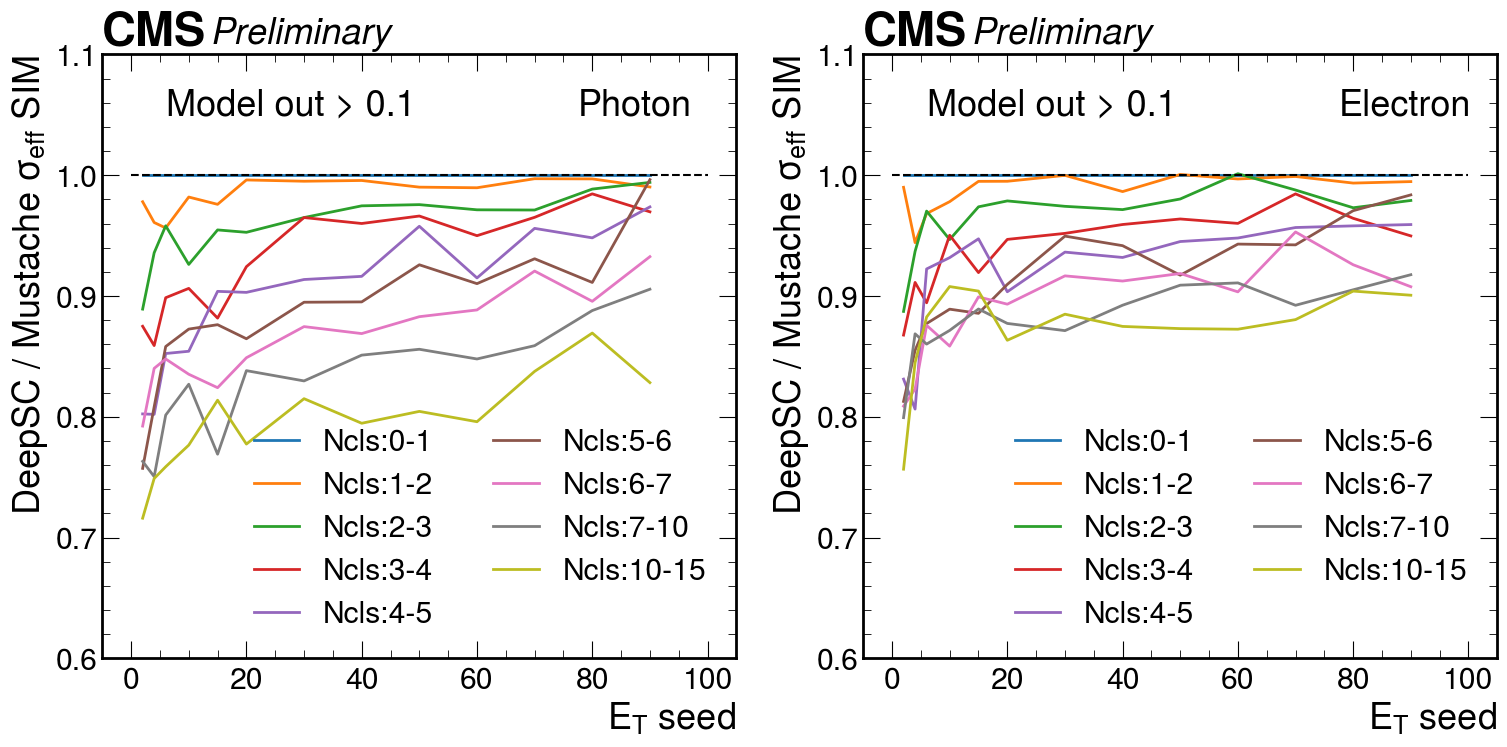

In [37]:
fig, (ax, ay) = plt.subplots(1,2, figsize=(18,8),dpi=100, )

thr = 0.1
df = df_gamma[df_gamma.thr==thr]
flavour ="Photon"
ets = [2,4,6,10,15,20,30,40,50,60,70,80,90,100]
ncls = [0,1,2,3,4,5,6,7,10,15]
df["et_bin"] = pd.cut(df.et, ets, labels=list(range(len(ets)-1)))
df["ncls_bin"] = pd.cut(df.ncls, ncls, labels=list(range(len(ncls)-1)))


res = df.groupby(["et_bin","ncls_bin"]).apply(bin_analysis("En_ovEtrue_sim_good"))
res_must = df.groupby(["et_bin","ncls_bin"]).apply(bin_analysis("En_ovEtrue_sim_good_mustache"))
res.reset_index(level=0, inplace=True)
res.reset_index(level=0, inplace=True)
res_must.reset_index(level=0, inplace=True)
res_must.reset_index(level=0, inplace=True)


# gs = fig.add_gridspec(2, hspace=0.1, height_ratios=[0.8,0.2])
# axs = gs.subplots(sharex=True)

for ieta, eta in enumerate(ncls[:-1]):
    ax.plot(ets[:-1], res[res.ncls_bin == ieta].w68/res_must[res_must.ncls_bin == ieta].w68, label="Ncls:{}-{}".format(ncls[ieta], ncls[ieta+1]), linewidth=2)
ax.set_ylim(0.6, 1.1)
ax.set_ylabel("DeepSC / Mustache $\sigma_{eff}$ SIM")
ax.legend(ncol=2)
ax.set_xlabel("$E_T$ seed")
ax.plot([0,100],[1,1], linestyle="dashed", color="black")

ax.text(0.75, 0.9, flavour, transform=ax.transAxes)
ax.text(0.1, 0.9, "Model out > {}".format(thr), transform=ax.transAxes)

hep.cms.text("Preliminary", loc=0, ax=ax)



df = df_ele[df_ele.thr==thr]
flavour = "Electron"

ets = [2,4,6,10,15,20,30,40,50,60,70,80,90,100]
ncls = [0,1,2,3,4,5,6,7,10,15]
df["et_bin"] = pd.cut(df.et, ets, labels=list(range(len(ets)-1)))
df["ncls_bin"] = pd.cut(df.ncls, ncls, labels=list(range(len(ncls)-1)))


res = df.groupby(["et_bin","ncls_bin"]).apply(bin_analysis("En_ovEtrue_sim_good"))
res_must = df.groupby(["et_bin","ncls_bin"]).apply(bin_analysis("En_ovEtrue_sim_good_mustache"))
res.reset_index(level=0, inplace=True)
res.reset_index(level=0, inplace=True)
res_must.reset_index(level=0, inplace=True)
res_must.reset_index(level=0, inplace=True)

for ieta, eta in enumerate(ncls[:-1]):
    ay.plot(ets[:-1], res[res.ncls_bin == ieta].w68/res_must[res_must.ncls_bin == ieta].w68, label="Ncls:{}-{}".format(ncls[ieta], ncls[ieta+1]), linewidth=2)
ay.set_ylim(0.6, 1.1)
ay.set_ylabel("DeepSC / Mustache $\sigma_{eff}$ SIM")
ay.legend(ncol=2)
ay.set_xlabel("$E_T$ seed")
ay.plot([0,100],[1,1], linestyle="dashed", color="black")

ay.text(0.75, 0.9, flavour, transform=ay.transAxes)
ay.text(0.1, 0.9, "Model out > {}".format(thr), transform=ay.transAxes)

hep.cms.text("Preliminary", loc=0, ax=ay)

<ipython-input-35-c4e38892352d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["et_bin"] = pd.cut(df.et, ets, labels=list(range(len(ets)-1)))
<ipython-input-35-c4e38892352d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["ncls_bin"] = pd.cut(df.ncls, ncls, labels=list(range(len(ncls)-1)))
<ipython-input-35-c4e38892352d>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

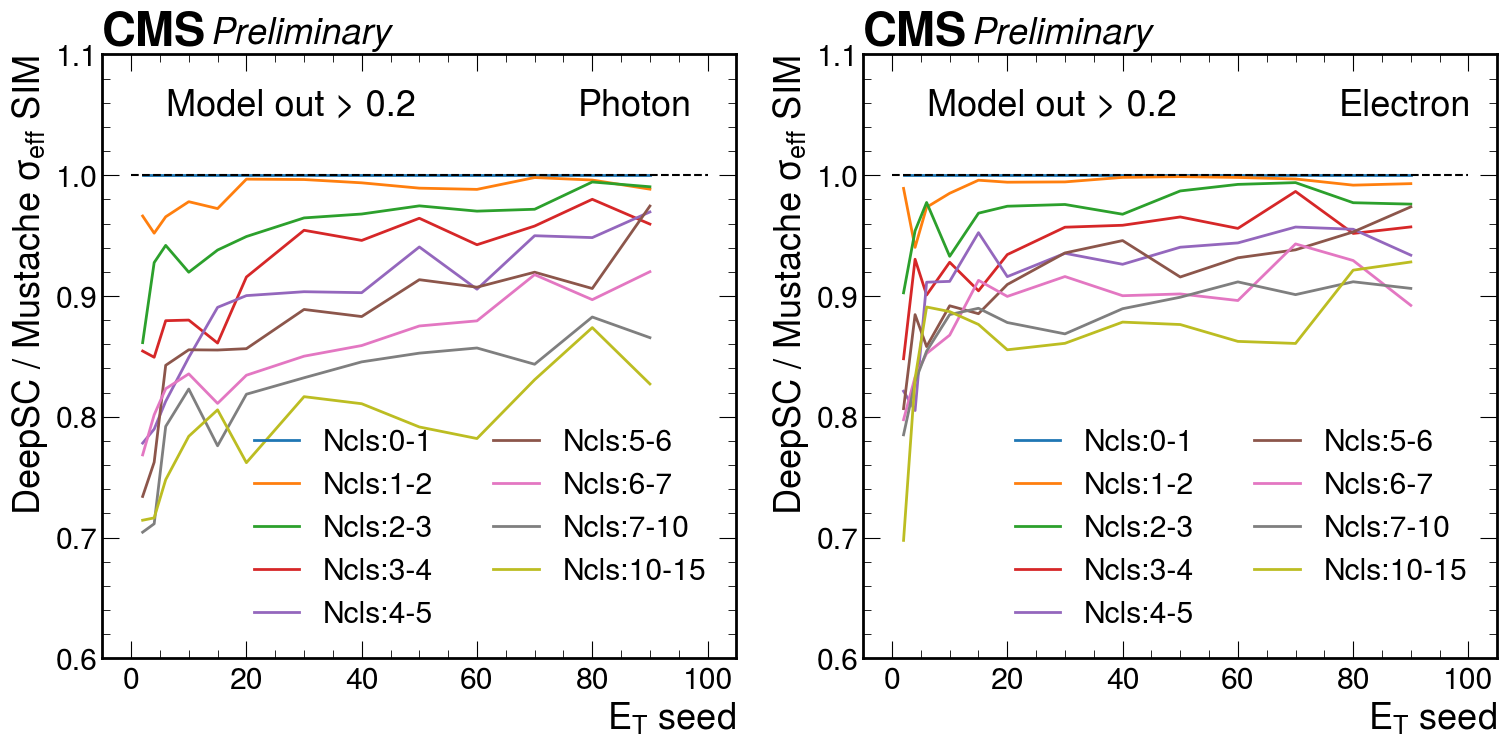

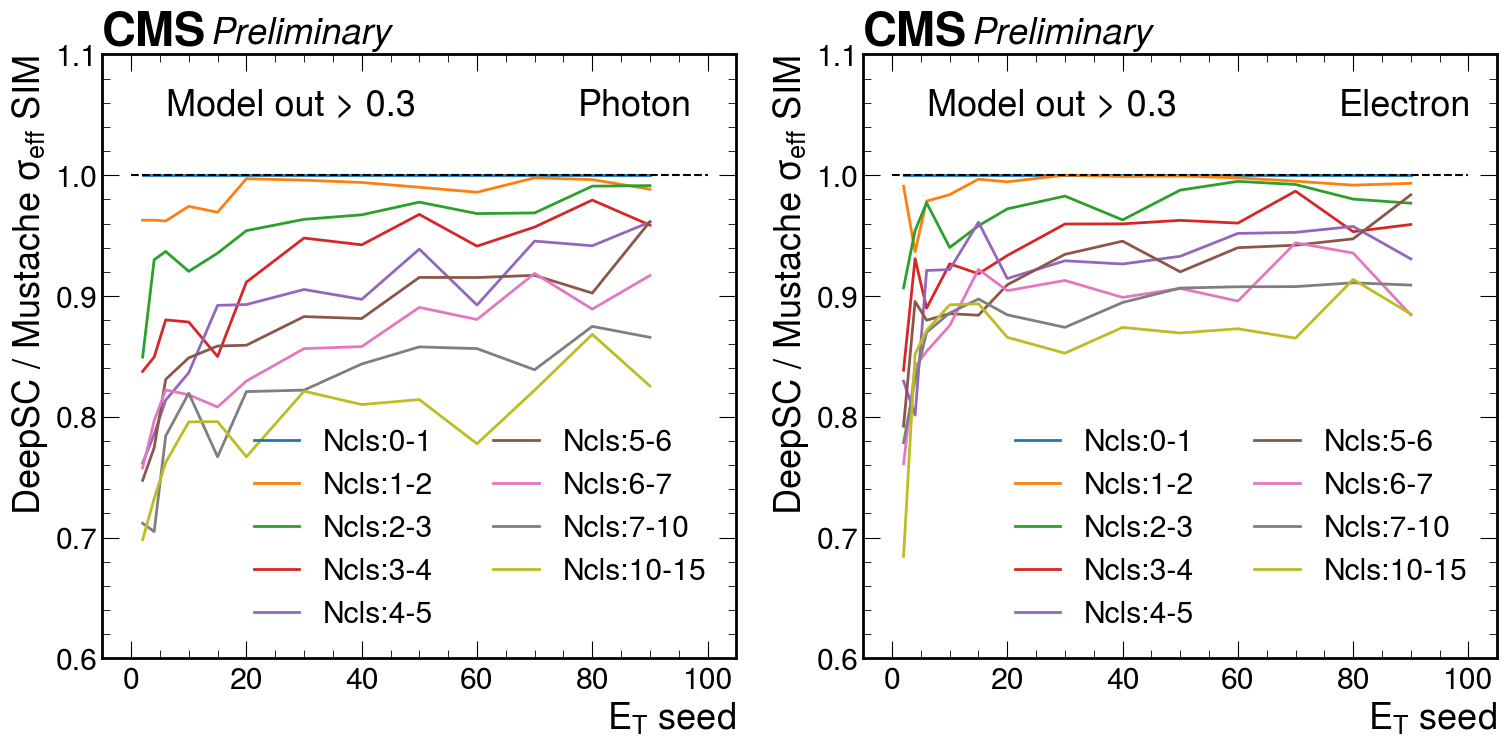

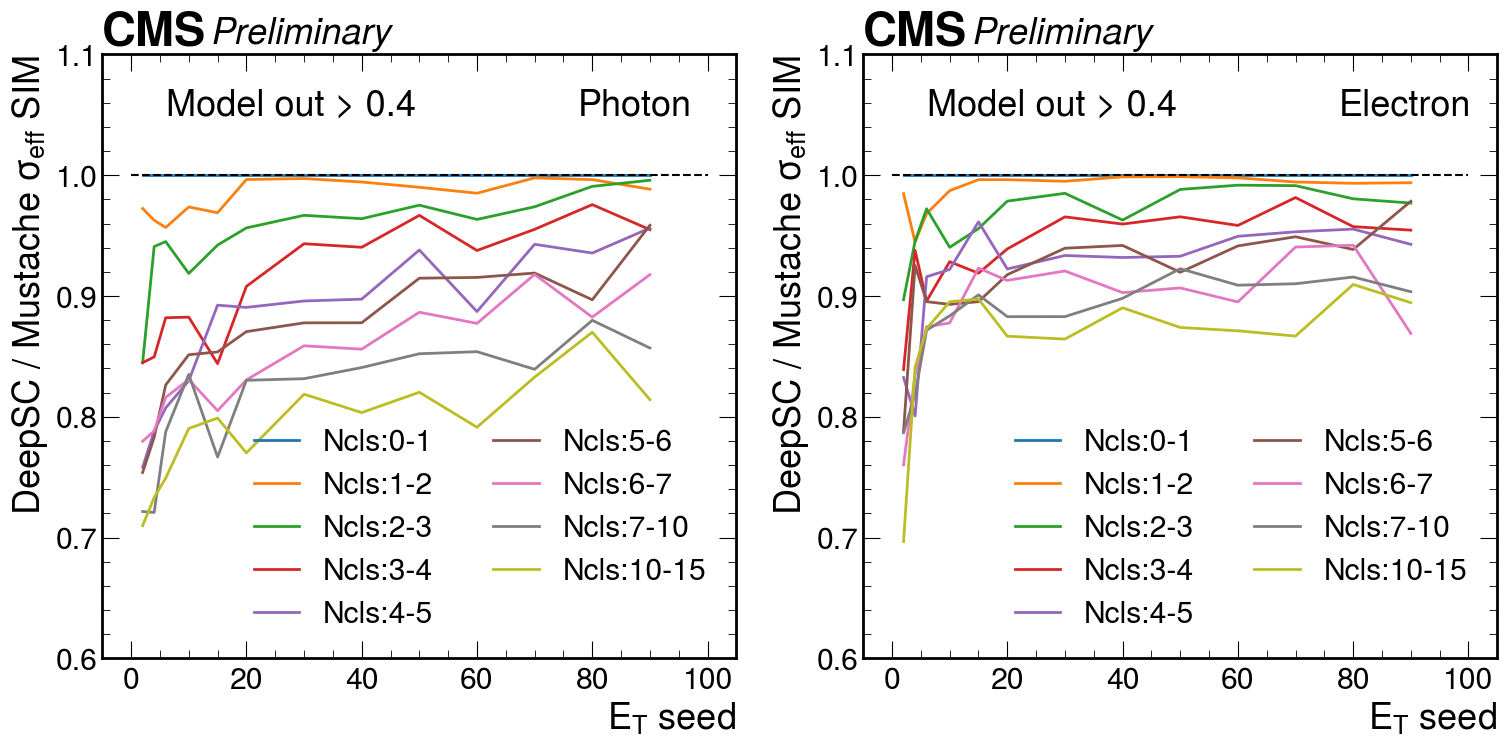

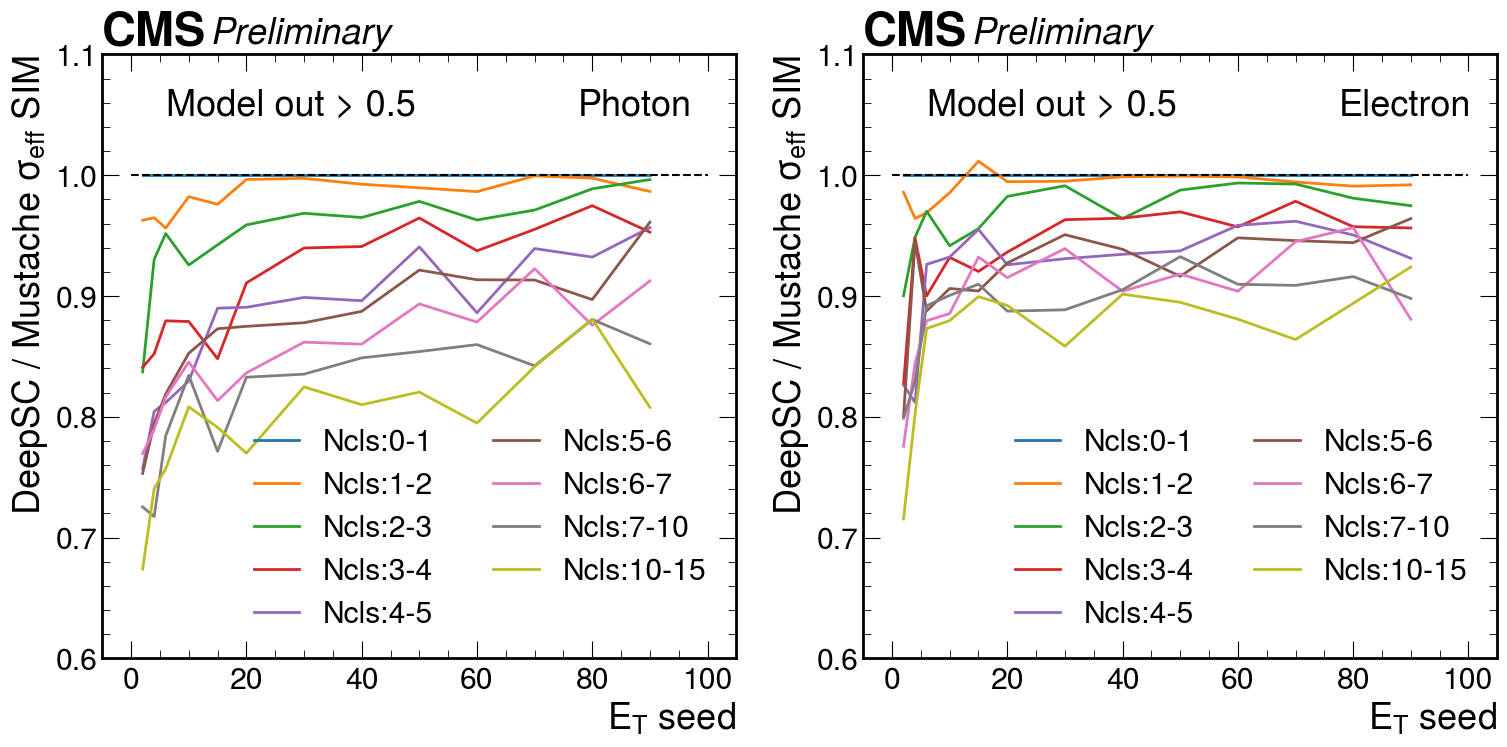

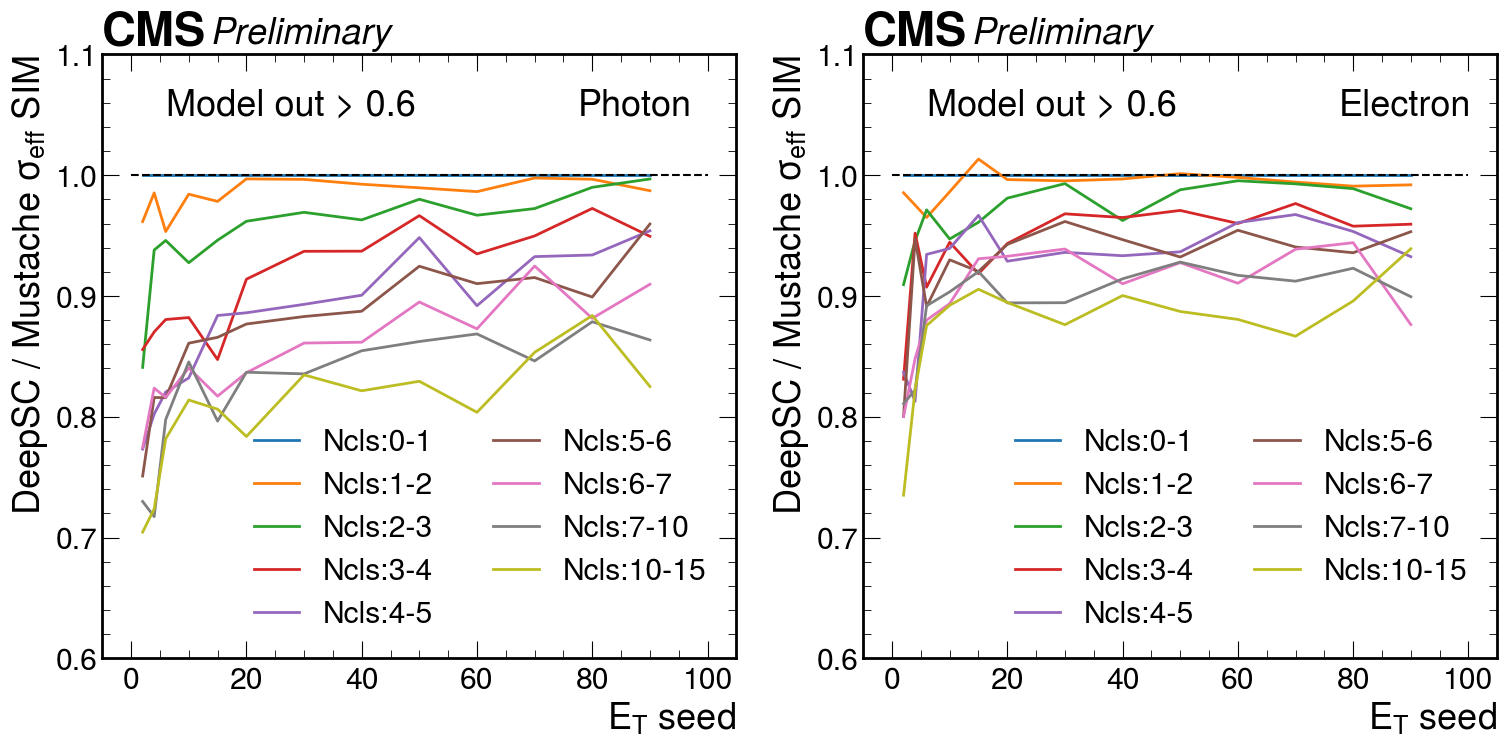

In [35]:
for thr in [0.2, 0.3,0.4,0.5, 0.6]:
    fig, (ax, ay) = plt.subplots(1,2, figsize=(18,8),dpi=100, )

    df = df_gamma[df_gamma.thr==thr]
    flavour ="Photon"
    ets = [2,4,6,10,15,20,30,40,50,60,70,80,90,100]
    ncls = [0,1,2,3,4,5,6,7,10,15]
    df["et_bin"] = pd.cut(df.et, ets, labels=list(range(len(ets)-1)))
    df["ncls_bin"] = pd.cut(df.ncls, ncls, labels=list(range(len(ncls)-1)))


    res = df.groupby(["et_bin","ncls_bin"]).apply(bin_analysis("En_ovEtrue_sim_good"))
    res_must = df.groupby(["et_bin","ncls_bin"]).apply(bin_analysis("En_ovEtrue_sim_good_mustache"))
    res.reset_index(level=0, inplace=True)
    res.reset_index(level=0, inplace=True)
    res_must.reset_index(level=0, inplace=True)
    res_must.reset_index(level=0, inplace=True)


    # gs = fig.add_gridspec(2, hspace=0.1, height_ratios=[0.8,0.2])
    # axs = gs.subplots(sharex=True)

    for ieta, eta in enumerate(ncls[:-1]):
        ax.plot(ets[:-1], res[res.ncls_bin == ieta].w68/res_must[res_must.ncls_bin == ieta].w68, label="Ncls:{}-{}".format(ncls[ieta], ncls[ieta+1]), linewidth=2)
    ax.set_ylim(0.6, 1.1)
    ax.set_ylabel("DeepSC / Mustache $\sigma_{eff}$ SIM")
    ax.legend(ncol=2)
    ax.set_xlabel("$E_T$ seed")
    ax.plot([0,100],[1,1], linestyle="dashed", color="black")

    ax.text(0.75, 0.9, flavour, transform=ax.transAxes)
    ax.text(0.1, 0.9, "Model out > {}".format(thr), transform=ax.transAxes)

    hep.cms.text("Preliminary", loc=0, ax=ax)



    df = df_ele[df_ele.thr==thr]
    flavour = "Electron"

    ets = [2,4,6,10,15,20,30,40,50,60,70,80,90,100]
    ncls = [0,1,2,3,4,5,6,7,10,15]
    df["et_bin"] = pd.cut(df.et, ets, labels=list(range(len(ets)-1)))
    df["ncls_bin"] = pd.cut(df.ncls, ncls, labels=list(range(len(ncls)-1)))


    res = df.groupby(["et_bin","ncls_bin"]).apply(bin_analysis("En_ovEtrue_sim_good"))
    res_must = df.groupby(["et_bin","ncls_bin"]).apply(bin_analysis("En_ovEtrue_sim_good_mustache"))
    res.reset_index(level=0, inplace=True)
    res.reset_index(level=0, inplace=True)
    res_must.reset_index(level=0, inplace=True)
    res_must.reset_index(level=0, inplace=True)

    for ieta, eta in enumerate(ncls[:-1]):
        ay.plot(ets[:-1], res[res.ncls_bin == ieta].w68/res_must[res_must.ncls_bin == ieta].w68, label="Ncls:{}-{}".format(ncls[ieta], ncls[ieta+1]), linewidth=2)
    ay.set_ylim(0.6, 1.1)
    ay.set_ylabel("DeepSC / Mustache $\sigma_{eff}$ SIM")
    ay.legend(ncol=2)
    ay.set_xlabel("$E_T$ seed")
    ay.plot([0,100],[1,1], linestyle="dashed", color="black")

    ay.text(0.75, 0.9, flavour, transform=ay.transAxes)
    ay.text(0.1, 0.9, "Model out > {}".format(thr), transform=ay.transAxes)

    hep.cms.text("Preliminary", loc=0, ax=ay)